In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [104]:
data = pd.read_csv('telco_customer_churn.csv')
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [106]:
data_cleaned = data.drop('customerID', axis=1)
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [107]:
def clean_and_map(df, col_to_encode, map, col_name):
    df[col_name] = df[col_to_encode].map(map)
    df = df.drop(col_to_encode, axis=1)
    return df 

In [108]:
data_cleaned = clean_and_map(data_cleaned, 'gender', {'Male': 1, 'Female': 0}, 'Male_flag')
data.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [109]:
yes_no_map = {'Yes': 1, 'No': 0}

In [110]:
data_cleaned = clean_and_map(data_cleaned, 'Partner', yes_no_map, 'Partner_flag')
data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [111]:
data_cleaned = clean_and_map(data_cleaned, 'Dependents', yes_no_map, 'Dependents_flag')
data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [112]:
data_cleaned = clean_and_map(data_cleaned, 'PhoneService', yes_no_map, 'PhoneService_flag')
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [113]:
data_cleaned = clean_and_map(data_cleaned, 'MultipleLines', {'No phone service': 0, 'No': 1, 'Yes': 2}, 'Lines')
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [114]:
data_cleaned = clean_and_map(data_cleaned, 'InternetService', {'DSL': 1, 'Fiber optic': 2, 'No': 0}, 'InternetServiceLevel')
data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [115]:
yes_no_internet_map = {'No': -1, 'Yes': 1, 'No internet service': 0}

In [116]:
data_cleaned = clean_and_map(data_cleaned, 'OnlineSecurity', yes_no_internet_map, 'OnelineSecurityLevel')
data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [117]:
data_cleaned = clean_and_map(data_cleaned, 'OnlineBackup', yes_no_internet_map, 'OnlineBackupLevel')
data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [118]:
data_cleaned = clean_and_map(data_cleaned, 'DeviceProtection', yes_no_internet_map, 'DeviceProtectionLevel')
data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [119]:
data_cleaned = clean_and_map(data_cleaned, 'TechSupport', yes_no_internet_map, 'TechSupportLevel')
data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [120]:
data_cleaned = clean_and_map(data_cleaned, 'StreamingTV', yes_no_internet_map, 'StreamingTVLevel')
data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [121]:
data_cleaned = clean_and_map(data_cleaned, 'StreamingMovies', yes_no_internet_map, 'StreamingMoviesLevel')
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [122]:
data_cleaned = clean_and_map(data_cleaned, 'Contract', {'One year': 1, 'Two year': 2, 'Month-to-month': 0}, 'ContractLevel')
data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [123]:
data_cleaned = clean_and_map(data_cleaned, 'PaperlessBilling', yes_no_map, 'PaperlessBilling_flag')
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [124]:
data_cleaned = clean_and_map(data_cleaned, 'PaymentMethod', {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}, 'AutomaticPayment')

In [125]:
sorted(data.TotalCharges.unique())[:10]

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05']

In [126]:
temp_df = pd.DataFrame()
temp_df['TotalCharges'] = data.TotalCharges.replace(' ', np.nan)
temp_df.TotalCharges = temp_df.TotalCharges.astype(float)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [127]:
data_cleaned.TotalCharges = temp_df.TotalCharges

In [128]:
data_cleaned = clean_and_map(data_cleaned, 'Churn', yes_no_map, 'Churn_flag')

In [129]:
data_cleaned

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Male_flag,Partner_flag,Dependents_flag,PhoneService_flag,Lines,InternetServiceLevel,OnelineSecurityLevel,OnlineBackupLevel,DeviceProtectionLevel,TechSupportLevel,StreamingTVLevel,StreamingMoviesLevel,ContractLevel,PaperlessBilling_flag,AutomaticPayment,Churn_flag
0,0,1,29.85,29.85,0,1,0,0,0,1,-1,1,-1,-1,-1,-1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,1,1,1,-1,1,-1,-1,-1,1,0,0,0
2,0,2,53.85,108.15,1,0,0,1,1,1,1,1,-1,-1,-1,-1,0,1,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,1,-1,1,1,-1,-1,1,0,1,0
4,0,2,70.70,151.65,0,0,0,1,1,2,-1,-1,-1,-1,-1,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,1,1,-1,1,1,1,1,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,2,2,-1,1,1,-1,1,1,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,1,-1,-1,-1,-1,-1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,2,2,-1,-1,-1,-1,-1,-1,0,1,0,1


In [130]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          7043 non-null   int64  
 1   tenure                 7043 non-null   int64  
 2   MonthlyCharges         7043 non-null   float64
 3   TotalCharges           7032 non-null   float64
 4   Male_flag              7043 non-null   int64  
 5   Partner_flag           7043 non-null   int64  
 6   Dependents_flag        7043 non-null   int64  
 7   PhoneService_flag      7043 non-null   int64  
 8   Lines                  7043 non-null   int64  
 9   InternetServiceLevel   7043 non-null   int64  
 10  OnelineSecurityLevel   7043 non-null   int64  
 11  OnlineBackupLevel      7043 non-null   int64  
 12  DeviceProtectionLevel  7043 non-null   int64  
 13  TechSupportLevel       7043 non-null   int64  
 14  StreamingTVLevel       7043 non-null   int64  
 15  Stre

In [131]:
data_cleaned.dropna(inplace=True)

In [133]:
x_cols = data_cleaned.columns[:-1]
target = data_cleaned.columns[-1]
x = data_cleaned[x_cols]
y = data_cleaned[target]

In [138]:
import warnings
warnings.filterwarnings('ignore')

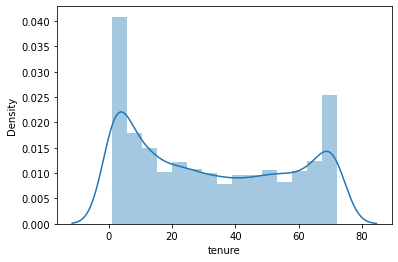

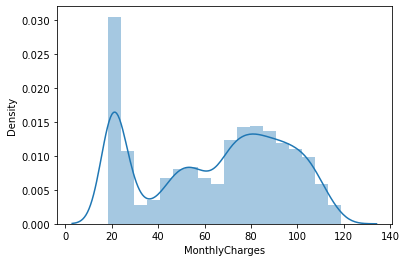

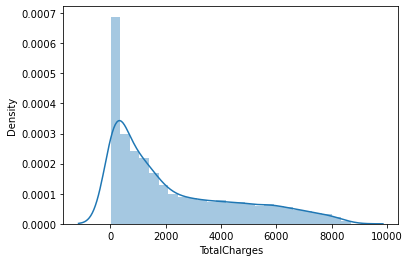

In [141]:
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in continuous_cols:
    sns.distplot(x[feature])
    plt.show()

In [145]:
x[continuous_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


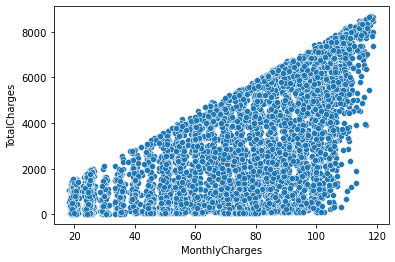

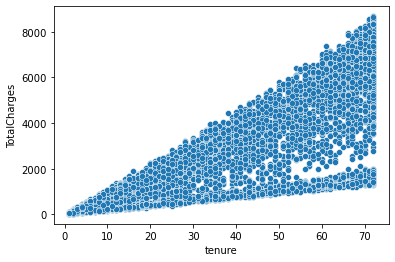

In [147]:
sns.scatterplot(x.MonthlyCharges, x.TotalCharges)
plt.show()

sns.scatterplot(x.tenure, x.TotalCharges)
plt.show()

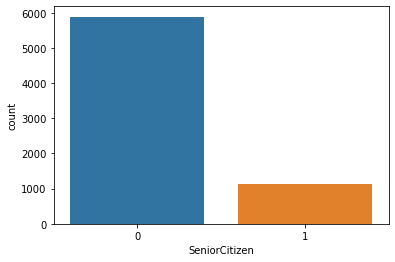

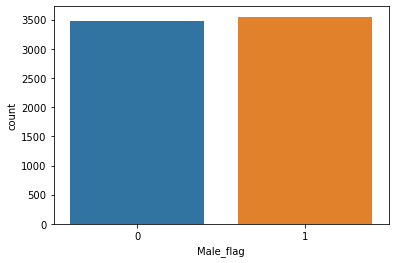

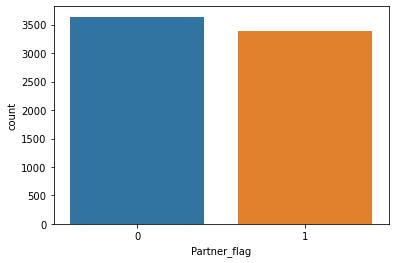

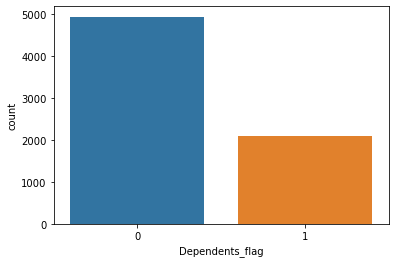

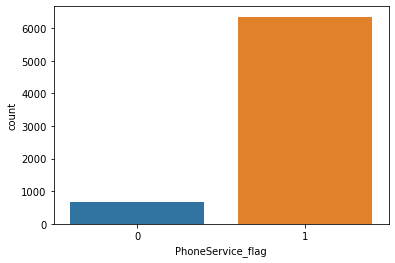

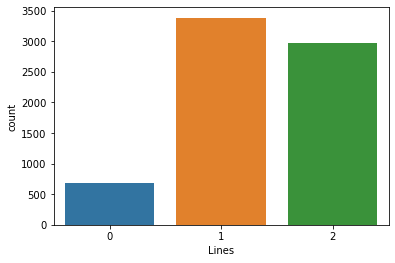

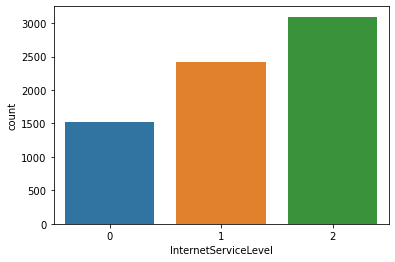

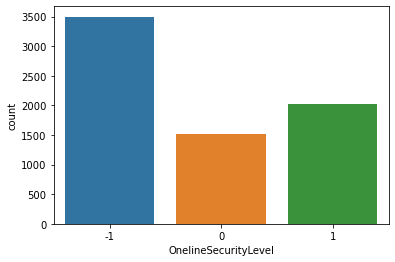

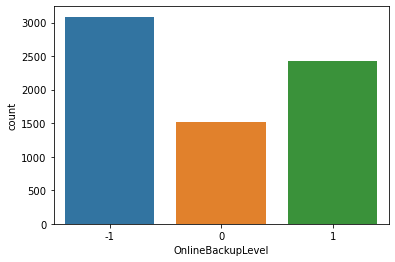

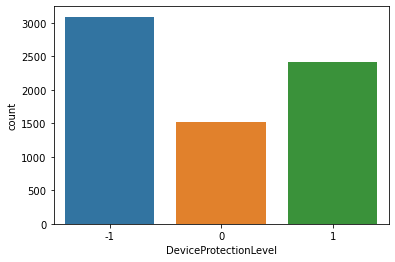

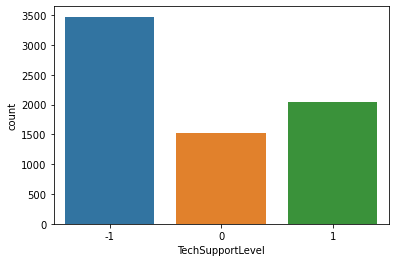

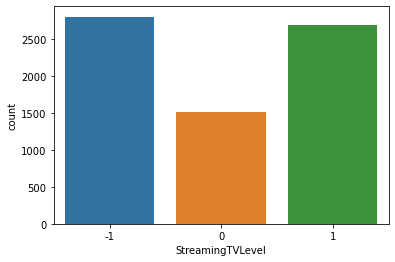

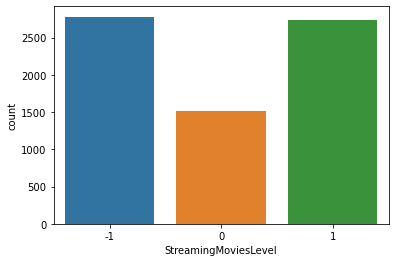

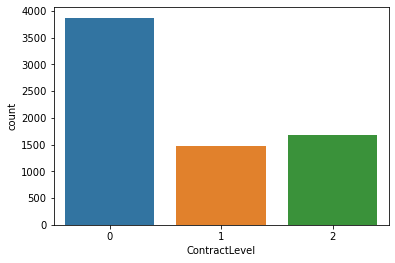

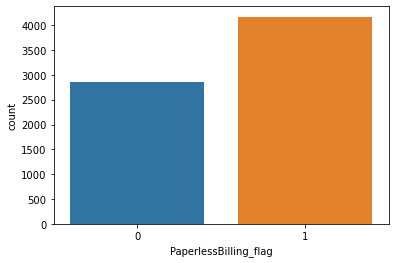

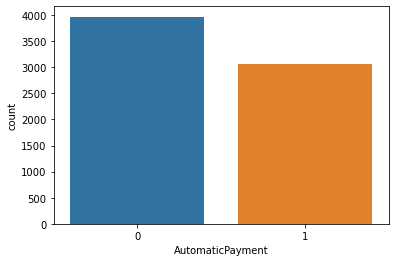

In [142]:
for feature in x_cols:
    if feature not in continuous_cols:
        sns.countplot(x[feature])
        plt.show()

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [149]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [150]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [151]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [152]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [155]:
from sklearn.metrics import accuracy_score, plot_roc_curve

In [154]:
accuracy_score(y_test, y_pred)

0.7997724687144482

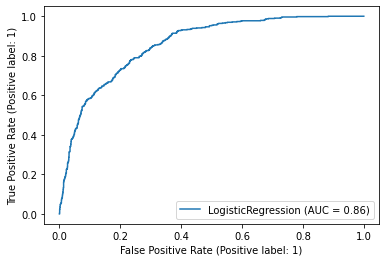

In [158]:
plot_roc_curve(model, x_test, y_test)
plt.show()